In [1]:
from accelerator import Lattice
from accelerator.elements import Drift, QuadrupoleThin
from accelerator import Beam
import numpy as np
import matplotlib.pyplot as plt

# transporting phase space coords

In [2]:
d = Drift(1)  # just a drift

In [3]:
lat = Lattice([d])

In [4]:
u, u_prime, dp, s = lat.transport([1, 1, 0], twiss=False)

In [5]:
u

array([1., 2.])

In [6]:
u_prime

array([1., 1.])

# transporting twiss parameters

In [7]:
b, a, g, s = lat.transport([1, 0, 1], twiss=True)

In [8]:
b

array([1., 2.])

In [9]:
a

array([ 0., -1.])

In [10]:
s

array([0, 1])

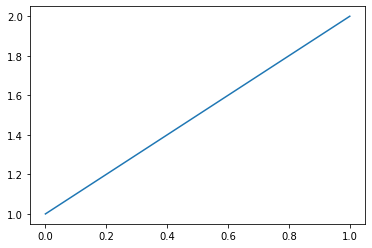

In [11]:
plt.plot(s, u)

# beam phase space ellipse

In [12]:
beam = Beam()

In [13]:
u, u_prime, dp = beam.ellipse([1,0,1])

In [14]:
u.shape

(1000,)

In [15]:
u_prime.shape

(1000,)

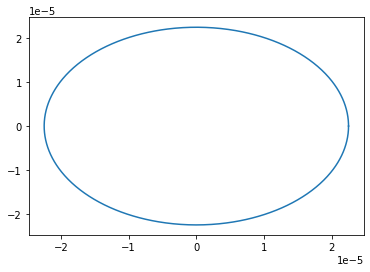

In [16]:
plt.plot(u, u_prime)

In [17]:
beam.ellipse([1,0,1])[0].T.shape

(1000,)

# transporting the ellipse through a drift

In [18]:
u, u_prime, dp, s = lat.transport(beam.ellipse([1,0,1]))

In [19]:
u.shape

(1000, 2)

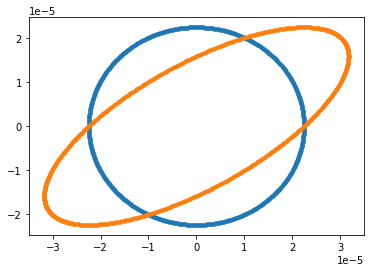

In [20]:
plt.plot(u, u_prime, linewidth=0, marker='.')

# Now with a fodo cell

In [21]:
beam = Beam()

In [22]:
f = 0.8  # focal length (m)
L = 1.  # drift length (m). Note FODO total length: 2L

half_quad_F = QuadrupoleThin(2.*f)
quad_D = QuadrupoleThin(-f)
drift = Drift(L)

In [23]:
FODO = Lattice([half_quad_F, drift, quad_D, drift, half_quad_F])

In [24]:
ellipse = beam.ellipse(FODO.m_h.twiss_solution)

In [25]:
u, u_prime, dp, s = FODO.transport(ellipse)

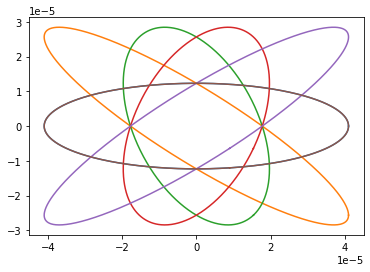

In [26]:
plt.plot(u, u_prime);

# slicing drift to get better beta curves

In [41]:
beta, alpha, gamma, s = FODO.slice(Drift, 20).transport(FODO.m_h.twiss_solution, twiss=True)

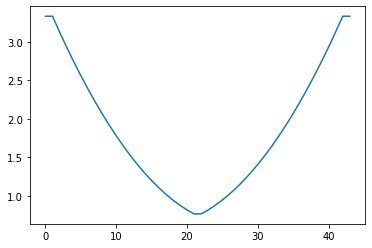

In [42]:
plt.plot(beta)

# vizualize particle trajectories through 8 fodo cells

In [47]:
x, x_prime, dp, s = (FODO*8).transport(Beam(n_particles=10).match(FODO.m_h.twiss_solution))

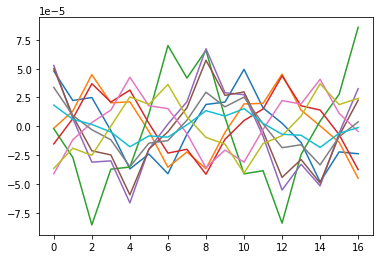

In [50]:
plt.plot(s, x.T);